In [1]:
######### MODULES ##########
import sys, os, re
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import celia_functions as cf

Found 1 files:
   2024 janvier 26 15_53_35 SHOT71.tif
1144401200.0


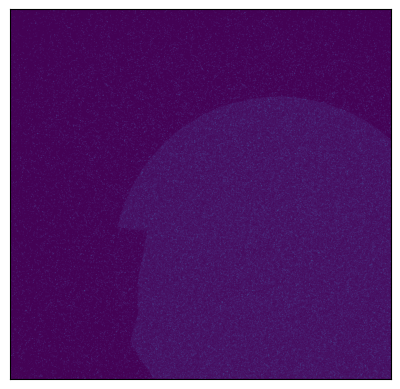

In [8]:
dataset = cf.read_diagnostic_data({"xray": [71]})
Ximage = dataset["xray"][dataset["shot"].index(71)]
Xsumm = np.sum(Ximage)
print(Xsumm)

plt.imshow(Ximage)
plt.xticks([])
plt.yticks([])
plt.show() 

Found 1 files:
   290124WIRESHOT211000_Ch1.csv
Found 1 files:
   290124WIRESHOT211000_Ch2.csv
Found 1 files:
   290124WIRESHOT211000_Ch3.csv


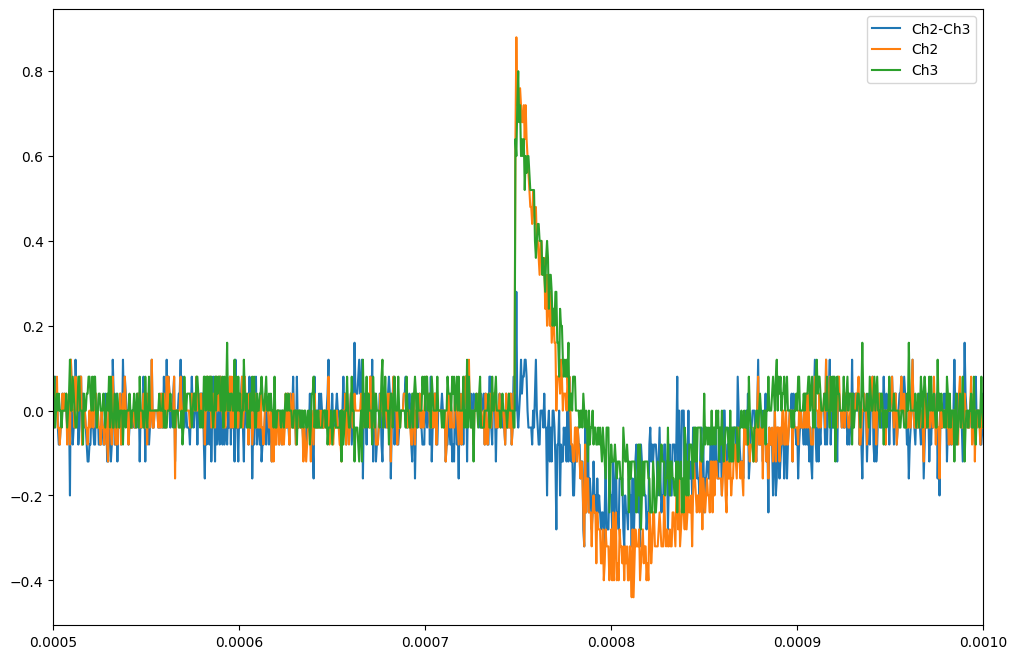

In [10]:
ShotN=211

dataset = cf.read_diagnostic_data({"pyro_time" :[ShotN],
                                  "Ch2": [ShotN],
                                  "Ch3": [ShotN]})

array_time = dataset["pyro_time"][dataset["shot"].index(ShotN)]
array_data = dataset["Ch2"][dataset["shot"].index(ShotN)]
array_data_EMP= dataset["Ch3"][dataset["shot"].index(ShotN)]

fig, axs = plt.subplots(figsize= (12,8))

plt.plot(array_time, array_data-array_data_EMP, label="Ch2-Ch3")
plt.plot(array_time, array_data, label ="Ch2")
plt.plot(array_time, array_data_EMP, label ="Ch3")

axs.set(xlim= (0.0005, 0.001))
plt.legend()
plt.show()


In [11]:
shot_min = 158
shot_max = 196
shots = np.arange(shot_min, shot_max)
diagnostics = ["bdot", "Ch1", "Ch2", "Ch3", "Ch4", "xray"]
request = {diagnostic: shots for diagnostic in diagnostics}

dataset = cf.read_diagnostic_data(request, silent= True)
bdot_maxs = [np.max(reading) for reading in dataset["bdot"]]
Ch1 = [np.abs(np.min(reading)) for reading in dataset["Ch1"]]
Ch2 = [np.abs(np.min(reading)) for reading in dataset["Ch2"]]
Ch3 = [np.abs(np.min(reading)) for reading in dataset["Ch3"]]
Ch4 = [np.abs(np.min(reading)) for reading in dataset["Ch4"]]
Xray = [np.sum(reading) for reading in dataset["xray"]]

shot_number_pyro = [shot if np.any(~np.isnan(data)) else np.nan for shot, data in zip(dataset["shot"], dataset["Ch1"])] #if there is no data for channel 1, replace the shot number with np.nan
shot_number_bdot = [shot if np.any(~np.isnan(data)) else np.nan for shot, data in zip(dataset["shot"], dataset["bdot"])]
shot_number_xray = [shot if np.any(~np.isnan(data)) else np.nan for shot, data in zip(dataset["shot"], dataset["xray"])]

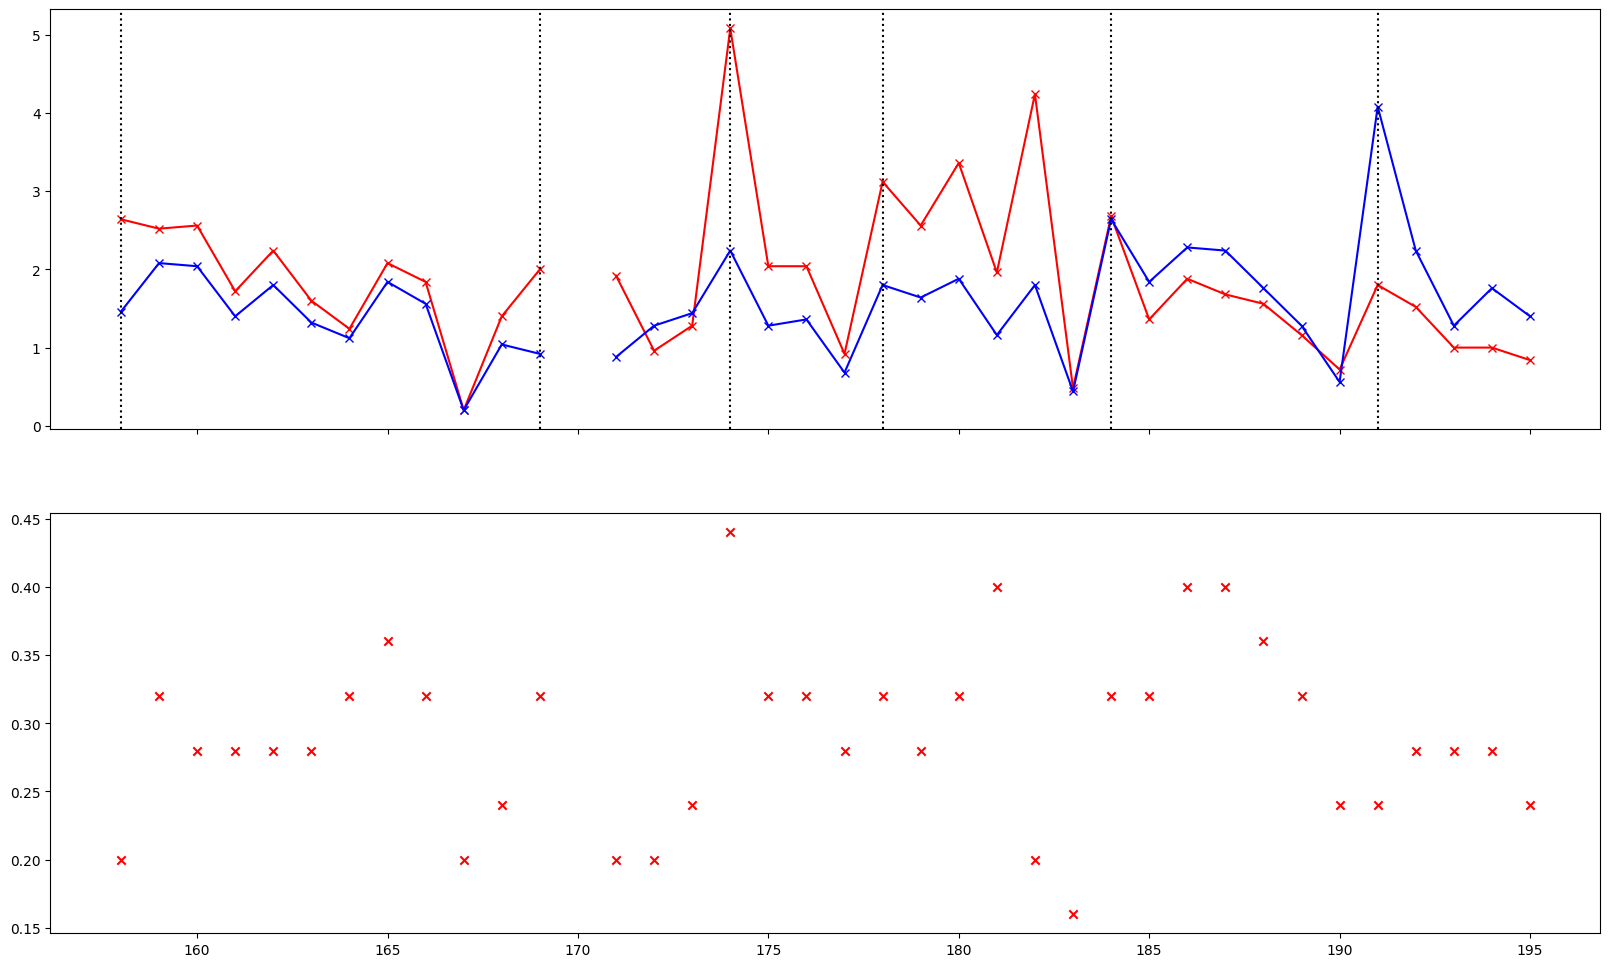

In [12]:
fig, axs = plt.subplots(2, 1, figsize= (20,12), sharex= True)

axs[0].plot(shot_number_pyro, Ch2, color="red", alpha=1, label="QMC pyro", marker="x")
axs[0].plot(shot_number_pyro, Ch3, color="blue", alpha=1, label="QMC pyro", marker="x")

axs[0].vlines([158,169,174,178,184,191], 0, 1, linestyles= "dotted", colors= "k", transform= axs[0].get_xaxis_transform())

axs[1].scatter(shot_number_pyro, Ch1, color="red", label="QMC pyro", marker="x")

plt.show()

In [14]:
shot_min = 211
shot_max = 236
shots = np.arange(shot_min, shot_max)
diagnostics = ["bdot", "Ch1", "Ch2", "Ch3", "Ch4", "xray"]
request = {diagnostic: shots for diagnostic in diagnostics}

dataset = cf.read_diagnostic_data(request, silent= True)
bdot_maxs = [np.max(reading) for reading in dataset["bdot"]]
Ch1 = [np.abs(np.min(reading)) for reading in dataset["Ch1"]]
Ch2 = [np.abs(np.min(reading)) for reading in dataset["Ch2"]]
Ch3 = [np.abs(np.min(reading)) for reading in dataset["Ch3"]]
Ch4 = [np.abs(np.min(reading)) for reading in dataset["Ch4"]]
Xray = [np.sum(reading) for reading in dataset["xray"]]

shot_number_pyro = [shot if np.any(~np.isnan(data)) else np.nan for shot, data in zip(dataset["shot"], dataset["Ch1"])] #if there is no data for channel 1, replace the shot number with np.nan
shot_number_bdot = [shot if np.any(~np.isnan(data)) else np.nan for shot, data in zip(dataset["shot"], dataset["bdot"])]
shot_number_xray = [shot if np.any(~np.isnan(data)) else np.nan for shot, data in zip(dataset["shot"], dataset["xray"])]

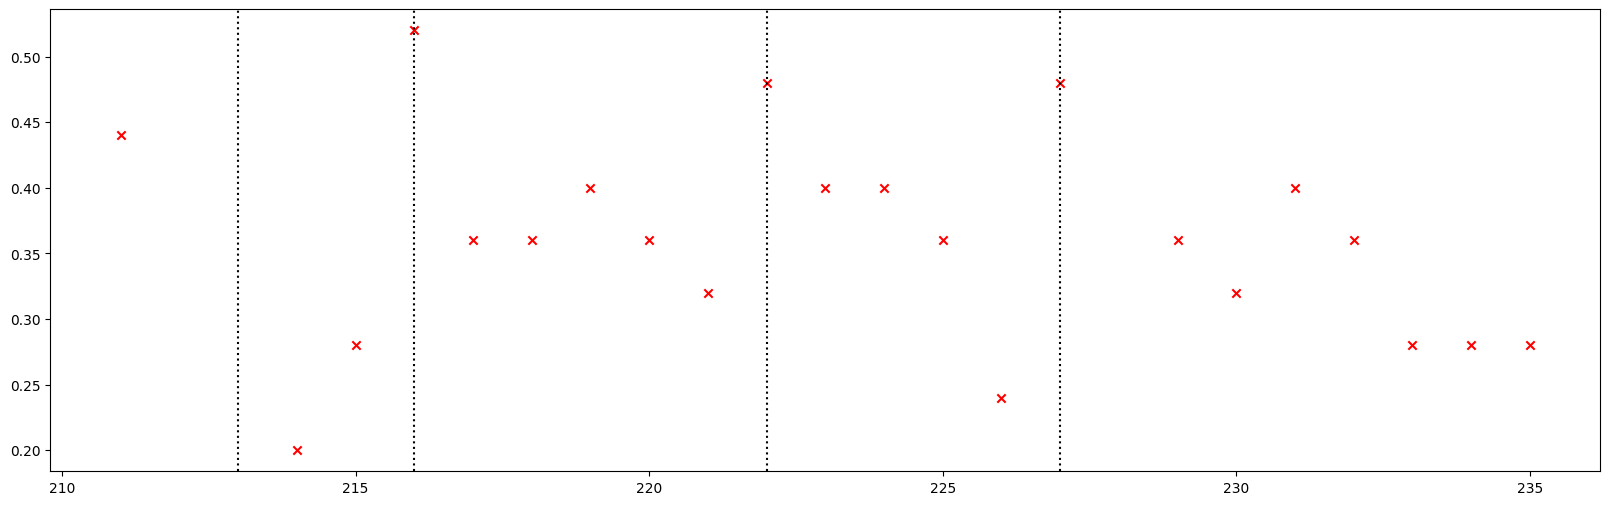

In [15]:
fig, axs = plt.subplots(figsize= (20, 6))

axs.scatter(shot_number_pyro, Ch2, color="red", label="QMC pyro", marker="x")
axs.vlines([213,216,222,227], 0, 1, linestyles ="dotted", colors ="k", transform= axs.get_xaxis_transform())

plt.show()

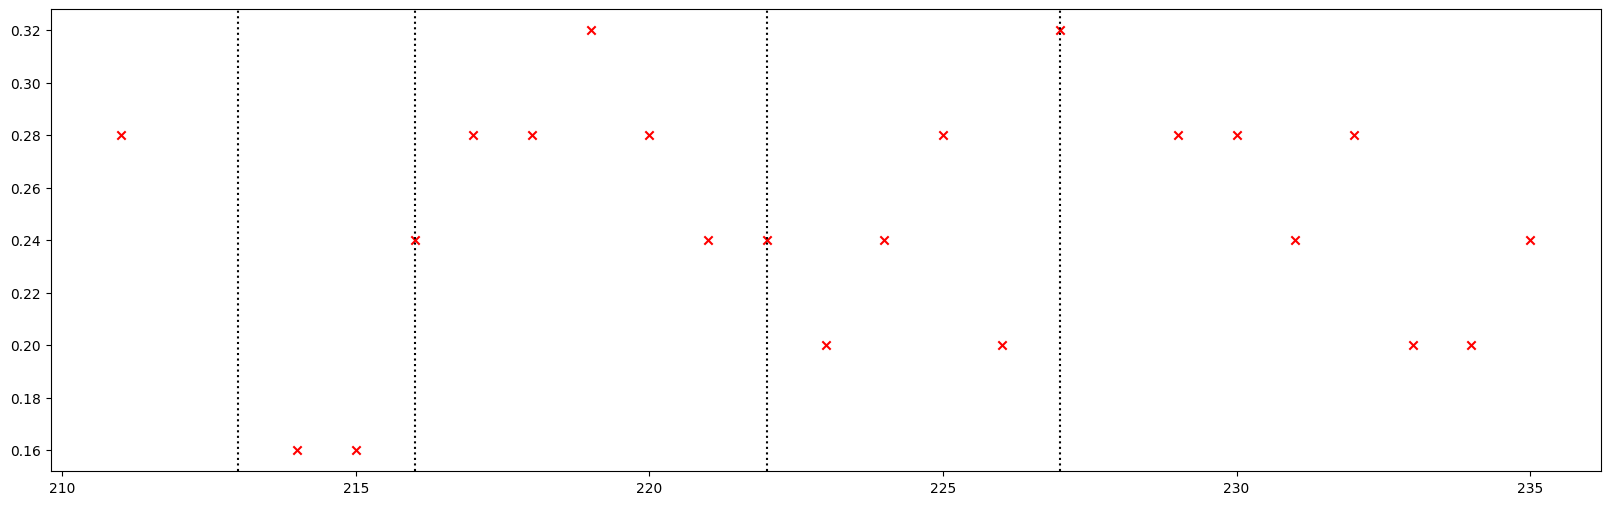

In [16]:
fig, axs = plt.subplots(figsize= (20,6))

axs.scatter(shot_number_pyro, Ch3, color="red", alpha=1, label="QMC pyro", marker="x")
axs.vlines([213, 216, 222, 227], 0, 1, linestyles ="dotted", colors ="k", transform= axs.get_xaxis_transform())

plt.show()

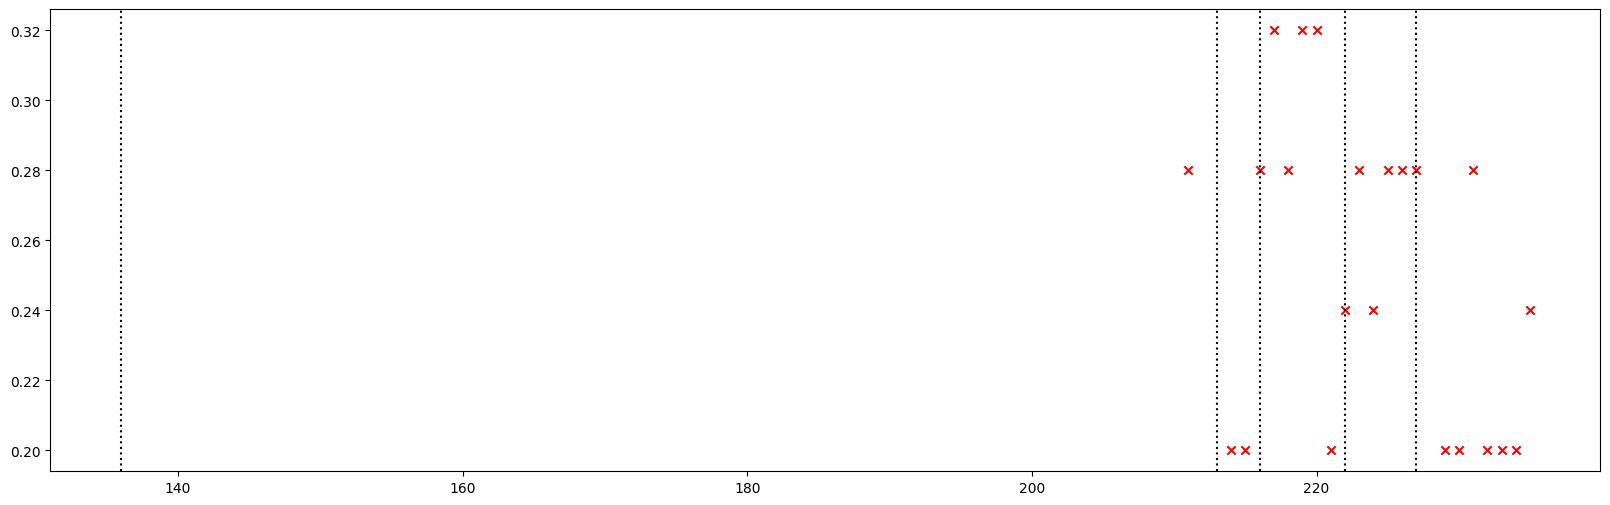

In [17]:
fig, axs = plt.subplots(figsize= (20,6))

axs.scatter(shot_number_pyro, Ch1, color="red", label="QMC pyro", marker="x")
axs.vlines([136,213,216,222,227], 0, 1, linestyles ="dotted", colors ="k", transform= axs.get_xaxis_transform())

plt.show()

In [18]:
laseren= np.array([0.969,0.954,0.91,0.927,0.856,0.905,0.872,0.812,0.838,0.767,0.834,0.835,0.815,0.838,0.811,0.774,0.824,0.835,0.774,0.804,0.757,0.759,0.798,0.725,0.768,0.67,0.637,0.677, 0.644,0.609])
laseren_shot_no = np.arange(107,137)

print(laseren.shape, laseren_shot_no.shape)
print(shot_number_pyro)
print(len(shot_number_pyro))

(30,) (30,)
[211, nan, nan, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, nan, 229, 230, 231, 232, 233, 234, 235]
25


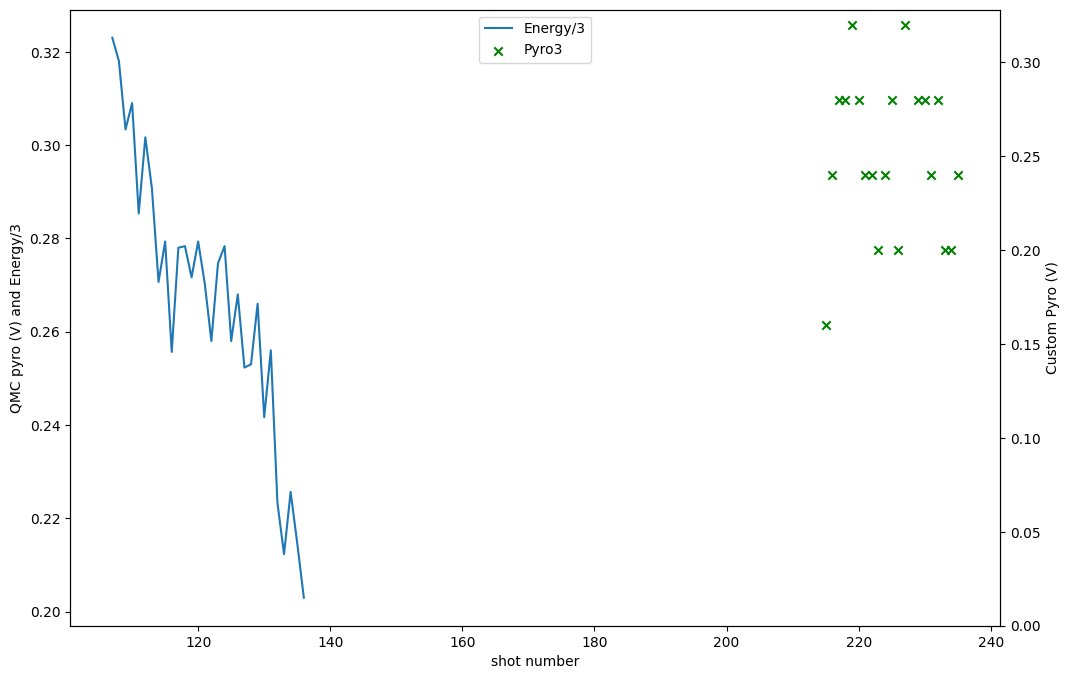

In [20]:
fig, axs = plt.subplots(figsize= (12,8))

line1 = axs.plot(laseren_shot_no, laseren/3, label="Energy/3")
axs.set(xlabel= "shot number", ylabel= "QMC pyro (V) and Energy/3")

twinax = axs.twinx()
line2 = twinax.scatter(shot_number_pyro[4:], Ch3[4:], color="green", alpha=1, label="Pyro3",marker="x")
twinax.set(xlabel= "shot number", ylabel= "Custom Pyro (V)", ylim= (0,None))

lines = [*line1, line2]
labels = [line.get_label() for line in lines]
axs.legend(lines, labels, loc= "upper center")

plt.show()

Found 3 files:
   290124WIRESHOT136000_Ch1.csv
   290124WIRESHOT110000_Ch1.csv
   290124WIRESHOT113000_Ch1.csv
Found 3 files:
   290124WIRESHOT136000_Ch1.csv
   290124WIRESHOT110000_Ch1.csv
   290124WIRESHOT113000_Ch1.csv
Found 3 files:
   290124WIRESHOT136000_Ch2.csv
   290124WIRESHOT110000_Ch2.csv
   290124WIRESHOT113000_Ch2.csv
Found 3 files:
   290124WIRESHOT136000_Ch3.csv
   290124WIRESHOT110000_Ch3.csv
   290124WIRESHOT113000_Ch3.csv
Found 3 files:
   290124WIRESHOT136000_Ch4.csv
   290124WIRESHOT110000_Ch4.csv
   290124WIRESHOT113000_Ch4.csv


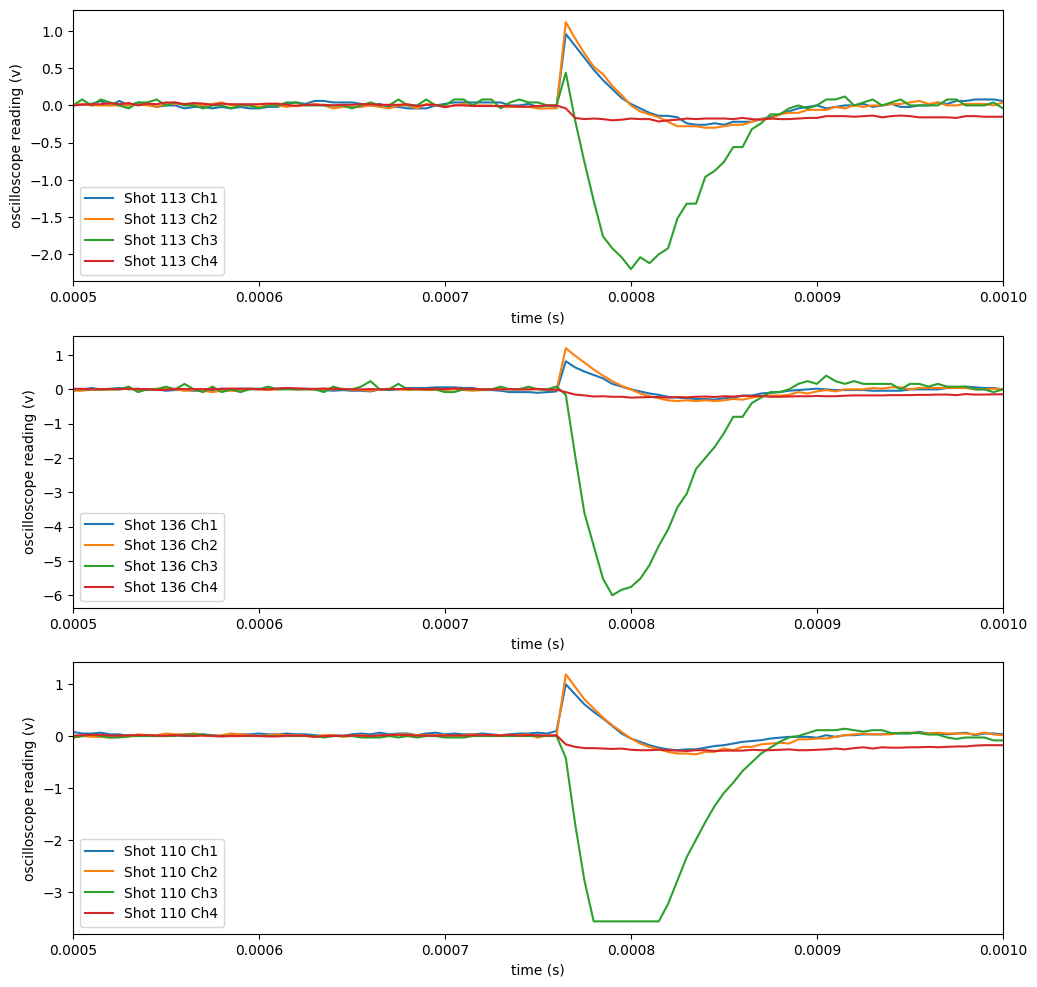

In [22]:
shots = [113, 136, 110]

dataset = cf.read_diagnostic_data({"pyro_time": shots,
                                "Ch1": shots,
                                "Ch2": shots,
                                "Ch3": shots,
                                "Ch4": shots})

fig, axs = plt.subplots(3, 1, figsize= (12,12))

for ax, shot in zip(axs, shots):
    for ch in ["Ch1","Ch2","Ch3","Ch4"]:
        ax.plot(dataset["pyro_time"][dataset["shot"].index(shot)], dataset[ch][dataset["shot"].index(shot)], label= "Shot {0:} {1:}".format(shot, ch))

    ax.set(xlim= (0.0005, 0.001), xlabel= "time (s)", ylabel= "oscilloscope reading (v)")
    ax.legend()

plt.show()
         


In [23]:
shot_min = 107
shot_max = 137
shots = np.arange(shot_min, shot_max)
diagnostics = ["bdot", "Ch1", "Ch2", "Ch3", "Ch4", "xray"]
request = {diagnostic: shots for diagnostic in diagnostics}

dataset = cf.read_diagnostic_data(request, silent= True)
bdot_maxs = [np.max(reading) for reading in dataset["bdot"]]
Ch1 = [np.abs(np.min(reading)) for reading in dataset["Ch1"]]
Ch2 = [np.abs(np.min(reading)) for reading in dataset["Ch2"]]
Ch3 = [np.abs(np.min(reading)) for reading in dataset["Ch3"]]
Ch4 = [np.abs(np.min(reading)) for reading in dataset["Ch4"]]
Xray = [np.sum(reading) for reading in dataset["xray"]]

shot_number_pyro = [shot if np.any(~np.isnan(data)) else np.nan for shot, data in zip(dataset["shot"], dataset["Ch1"])] #if there is no data for channel 1, replace the shot number with np.nan
shot_number_bdot = [shot if np.any(~np.isnan(data)) else np.nan for shot, data in zip(dataset["shot"], dataset["bdot"])]
shot_number_xray = [shot if np.any(~np.isnan(data)) else np.nan for shot, data in zip(dataset["shot"], dataset["xray"])]

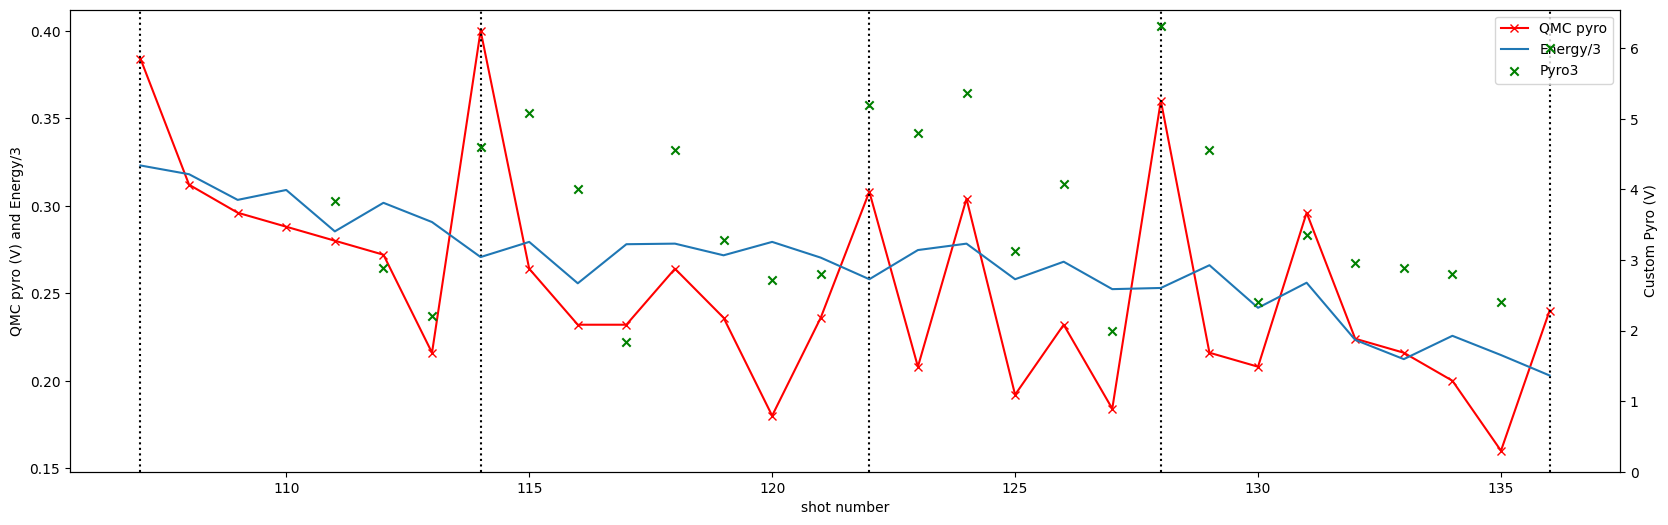

In [24]:
fig, axs = plt.subplots(figsize=(20,6))

line1 = axs.plot(shot_number_pyro, Ch4, color="red", label="QMC pyro", marker="x")
axs.vlines([107,114,122,128,136], 0, 1, linestyles ="dotted", colors ="k", transform= axs.get_xaxis_transform())
line2 = axs.plot(shot_number_pyro, laseren/3, label="Energy/3")
axs.set(ylabel = "QMC pyro (V) and Energy/3", xlabel= "shot number")

twinax = axs.twinx()
line3 = twinax.scatter(shot_number_pyro[4:], Ch3[4:], color="green", alpha=1, label="Pyro3",marker="x")
twinax.set(xlabel= "shot number", ylabel= "Custom Pyro (V)", ylim= (0, None))

lines = [*line1, *line2, line3]
labels = [line.get_label() for line in lines]
axs.legend(lines, labels)

plt.show()

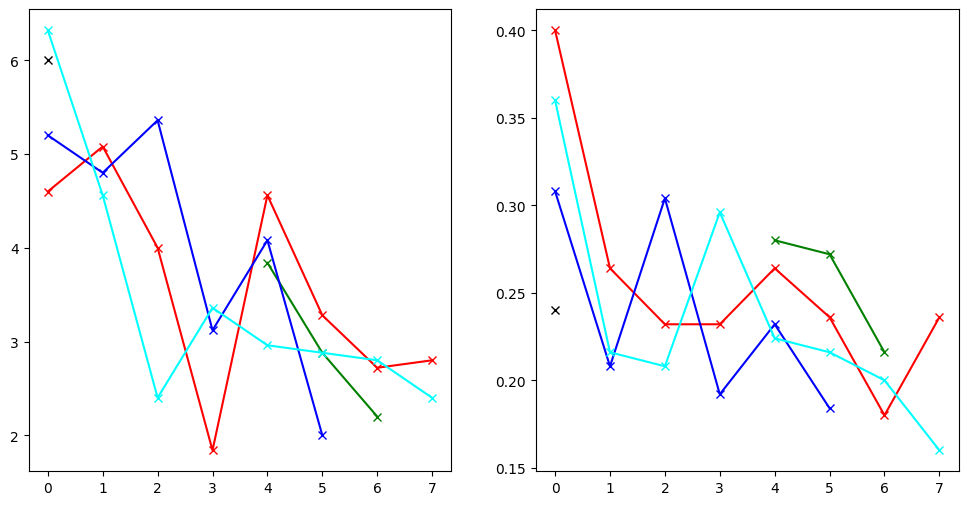

In [25]:
fig, axs = plt.subplots(1, 2, figsize= (12,6))

adj=[4,5,6]
axs[0].plot(adj,Ch3[4:7], color="green", marker="x")
axs[0].plot(Ch3[7:15], color="red", marker="x")
axs[0].plot(Ch3[15:21], color="blue", marker="x")
axs[0].plot(Ch3[21:29], color="cyan", marker="x")
axs[0].plot(Ch3[29:31], color="black", marker="x")


axs[1].plot(adj,Ch4[4:7], color="green", marker="x")
axs[1].plot(Ch4[7:15], color="red", marker="x")
axs[1].plot(Ch4[15:21], color="blue", marker="x")
axs[1].plot(Ch4[21:29], color="cyan", marker="x")
axs[1].plot(Ch4[29:31], color="black", marker="x")

plt.show()

Found 1 files:
   260124WIRESHOT71000_Ch1.csv
Found 1 files:
   260124WIRESHOT71000_Ch1.csv
Found 1 files:
   260124WIRESHOT71000_Ch2.csv
Found 1 files:
   260124WIRESHOT71000_Ch3.csv
Found 1 files:
   260124WIRESHOT71000_Ch4.csv


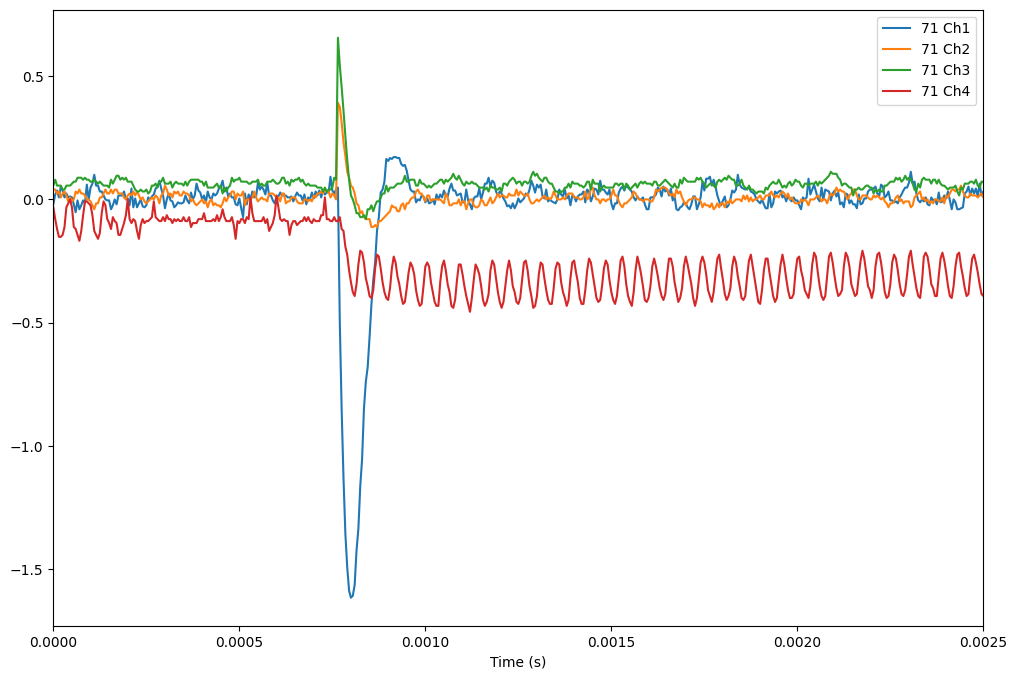

In [26]:
shoN=71

dataset = cf.read_diagnostic_data({"pyro_time": [shoN],
                                "Ch1": [shoN],
                                "Ch2": [shoN],
                                "Ch3": [shoN],
                                "Ch4": [shoN]})

array_data_ch1 = dataset["Ch1"][dataset["shot"].index(shoN)]
array_data_EMP = dataset["Ch2"][dataset["shot"].index(shoN)]
array_data_ch3 = dataset["Ch3"][dataset["shot"].index(shoN)]
array_data_ch4 = dataset["Ch4"][dataset["shot"].index(shoN)]
array_time = dataset["pyro_time"][dataset["shot"].index(shoN)]

fig, axs = plt.subplots(figsize= (12,8))

axs.plot(array_time, array_data_ch1 -array_data_EMP, label="{:d} Ch1".format(shoN))
axs.plot(array_time, array_data_EMP, label="{:d} Ch2".format(shoN))
axs.plot(array_time, array_data_ch3, label="{:d} Ch3".format(shoN))
axs.plot(array_time, array_data_ch4, label="{:d} Ch4".format(shoN))

axs.set(xlabel= "Time (s)", xlim= (0, 0.0025))

plt.legend()
plt.show()

In [27]:
shot_min = 71
shot_max = 76
shots = np.arange(shot_min, shot_max)
diagnostics = ["bdot", "Ch1", "Ch2", "Ch3", "Ch4", "xray"]
request = {diagnostic: shots for diagnostic in diagnostics}

dataset = cf.read_diagnostic_data(request, silent= True)
bdot_maxs = [np.max(reading) for reading in dataset["bdot"] if ~np.all(np.isnan(reading))]
pyro_mins = [np.abs(np.min(reading)) for reading in dataset["Ch1"] if ~np.all(np.isnan(reading))]
Ch2 = [np.max(reading)for reading in dataset["Ch2"] if ~np.all(np.isnan(reading))]
Ch3 = [np.abs(np.min(reading)) for reading in dataset["Ch3"] if ~np.all(np.isnan(reading))]
Ch4 = [np.abs(np.min(reading)) for reading in dataset["Ch4"] if ~np.all(np.isnan(reading))]
Xray = [np.sum(reading) for reading in dataset["xray"] if ~np.all(np.isnan(reading))]

shot_number_pyro = [shot for shot, data in zip(dataset["shot"], dataset["Ch1"]) if ~np.all(np.isnan(data))] #if there is no data for channel 1, replace the shot number with np.nan
shot_number_bdot = [shot for shot, data in zip(dataset["shot"], dataset["bdot"]) if ~np.all(np.isnan(data))]
shot_number_xray = [shot for shot, data in zip(dataset["shot"], dataset["xray"]) if ~np.all(np.isnan(data))]

print("Pyro mins " + str(pyro_mins))
print("Pyro maxs" + str(Ch2)) #somehow has more floating point errors than in Kirill's code

Pyro mins [1.56000004, 1.32000004, 1.60000004, 1.08000004]
Pyro maxs[0.392000009, 0.328000008, 0.208000006, 0.112000005]


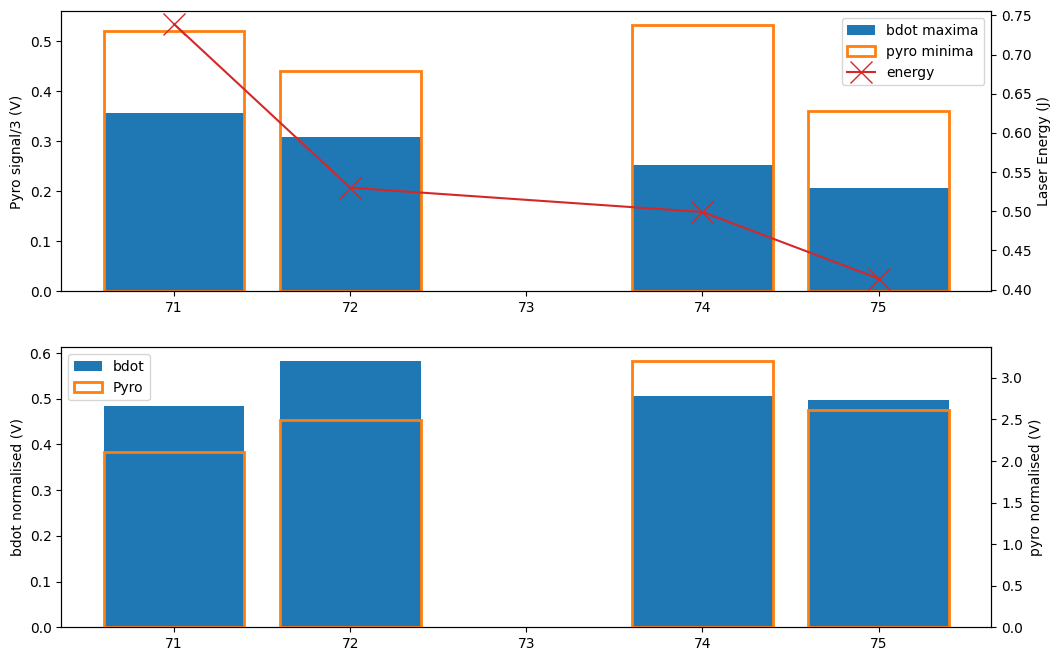

In [28]:
energies=[0.739,0.53,0.499,0.414]

fig, axs = plt.subplots(2, 1, figsize= (12,8))

line1 = axs[0].bar(shot_number_bdot, bdot_maxs, color= "tab:blue", label= "bdot maxima")
line2 = axs[0].bar(shot_number_pyro, np.divide(pyro_mins, 3), color= "None", edgecolor= "tab:orange", linewidth= 2, label= "pyro minima")
axs[0].set(ylabel= "Pyro signal/3 (V)")

twinax1 = axs[0].twinx()
line3 = twinax1.plot(shot_number_pyro, energies, marker= "x", markersize= 16, color= "tab:red", label= "energy")
twinax1.set(xlabel= "shot number", ylabel= "Laser Energy (J)")

lines1 = [line1, line2, *line3]
labels1 = [line.get_label() for line in lines1]
axs[0].legend(lines1, labels1)


bdot_norm = np.divide(bdot_maxs, energies)
pyro_mins_norm = np.divide(pyro_mins, energies)

line4 = axs[1].bar(shot_number_bdot, bdot_norm, color="tab:blue", label="bdot")
axs[1].set(ylabel= "bdot normalised (V)")

twinax2 = axs[1].twinx()
line5 = twinax2.bar(shot_number_pyro, pyro_mins_norm, color= "None", edgecolor= "tab:orange", linewidth= 2, label="Pyro")
twinax2.set(xlabel= "shot number", ylabel= "pyro normalised (V)")

lines2 = [line4, line5]
labels2 = [line.get_label() for line in lines2]
axs[1].legend(lines2, labels2)

plt.show()

In [29]:
shot_min = 71
shot_max = 76
shots = np.arange(shot_min, shot_max)
diagnostics = ["bdot", "Ch1", "Ch2", "Ch3", "Ch4", "xray"]
request = {diagnostic: shots for diagnostic in diagnostics}

dataset = cf.read_diagnostic_data(request, silent= True)
bdot_maxs = [np.max(reading) for reading in dataset["bdot"] if ~np.all(np.isnan(reading))]
Ch1 = [np.abs(np.min(reading)) for reading in dataset["Ch1"] if ~np.all(np.isnan(reading))]
Ch2 = [np.abs(np.max(reading)) for reading in dataset["Ch2"] if ~np.all(np.isnan(reading))]
Ch3 = [np.abs(np.max(reading)) for reading in dataset["Ch3"] if ~np.all(np.isnan(reading))]
Ch4 = [np.abs(np.min(reading)) for reading in dataset["Ch4"] if ~np.all(np.isnan(reading))]
Xray = [np.sum(reading) for reading in dataset["xray"] if ~np.all(np.isnan(reading))]

shot_number_pyro = [shot for shot, data in zip(dataset["shot"], dataset["Ch1"]) if ~np.all(np.isnan(data))] #if there is no data for channel 1, replace the shot number with np.nan
shot_number_bdot = [shot for shot, data in zip(dataset["shot"], dataset["bdot"]) if ~np.all(np.isnan(data))]
shot_number_Xray = [shot for shot, data in zip(dataset["shot"], dataset["xray"]) if ~np.all(np.isnan(data))]

print("Pyro mins " + str(pyro_mins))
print("Pyro maxs" + str(Ch2)) #somehow has more floating point errors than in Kirill's code

Pyro mins [1.56000004, 1.32000004, 1.60000004, 1.08000004]
Pyro maxs[0.392000009, 0.328000008, 0.208000006, 0.112000005]


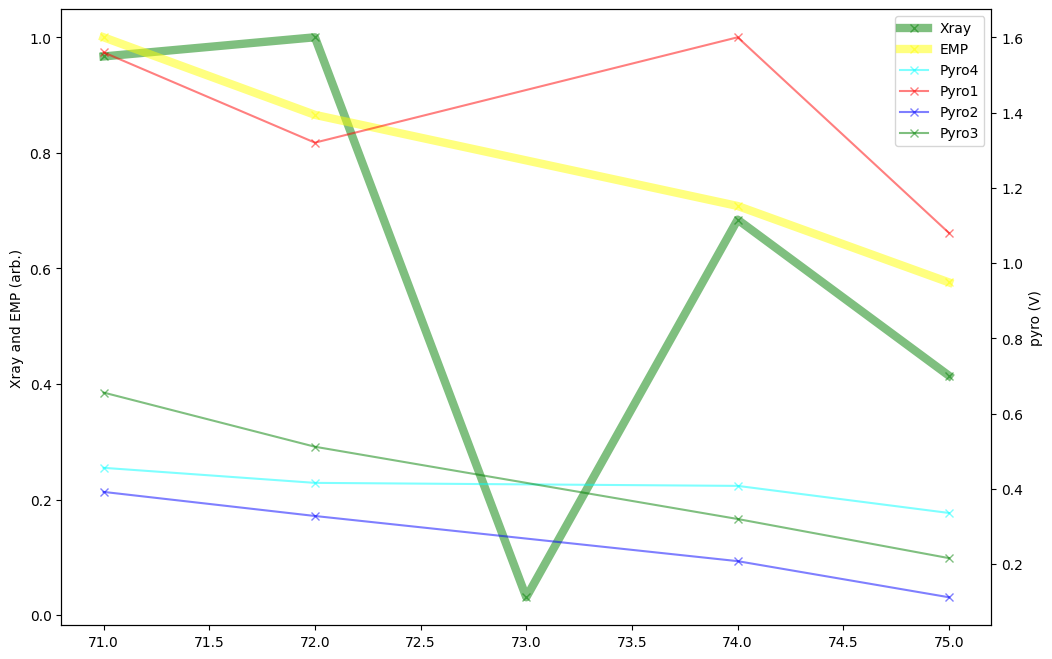

In [30]:
fig, axs = plt.subplots(figsize= (12,8))

line1 = axs.plot(shot_number_Xray, Xray/np.max(Xray), color="green", alpha=0.5, label="Xray", marker="x", linewidth=6.0)
line2 = axs.plot(shot_number_bdot, bdot_maxs/np.max(bdot_maxs), color="yellow", alpha=0.5, label="EMP", marker="x", linewidth=6.0)
axs.set(ylabel ="Xray and EMP (arb.)")

twinax = axs.twinx()
line3 = twinax.plot(shot_number_pyro, Ch4, color="cyan", alpha=0.5, label="Pyro4", marker="x")
line4 = twinax.plot(shot_number_pyro, Ch1, color="red", alpha=0.5, label="Pyro1", marker="x")
line5 = twinax.plot(shot_number_pyro, Ch2, color="blue", alpha=0.5, label="Pyro2",marker="x")
line6 = twinax.plot(shot_number_pyro, Ch3, color="green", alpha=0.5, label="Pyro3",marker="x")
twinax.set(xlabel= "shot number", ylabel= "pyro (V)")

lines = [*line1, *line2, *line3, *line4, *line5, *line6]
labels = [line.get_label() for line in lines]
axs.legend(lines, labels)

plt.show()